In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
Mer = pd.read_excel('mer_imputed_merged_data.xlsx')
Mer.head()

,datetime,direct_radiation (W/m²),PM25_MER,PM10_MER,SO2_MER,O3_MER,NO2_MER,CO_MER,RH_MER,TMP_MER,WDR_MER,WSP_MER,is_festival,is_weekend,AirQualityIndex
0,2020-11-25 01:00:00,0,35.0,72.0,8.0,1.0,47.0,1.8,44.0,15.6,256.0,0.5,0,0,4
1,2020-11-25 02:00:00,0,43.0,73.0,7.0,1.0,43.0,1.3,47.0,15.0,296.0,0.7,0,0,4
2,2020-11-25 03:00:00,0,37.0,60.0,6.0,1.0,39.0,0.9,49.0,14.4,302.0,0.5,0,0,4
3,2020-11-25 04:00:00,0,34.0,51.0,4.0,1.0,37.0,0.4,51.0,13.6,320.0,0.7,0,0,4
4,2020-11-25 05:00:00,0,28.0,59.0,5.0,1.0,40.0,0.7,56.0,12.6,90.0,1.2,0,0,4


## Vizualizing ouliers in all numeric columns

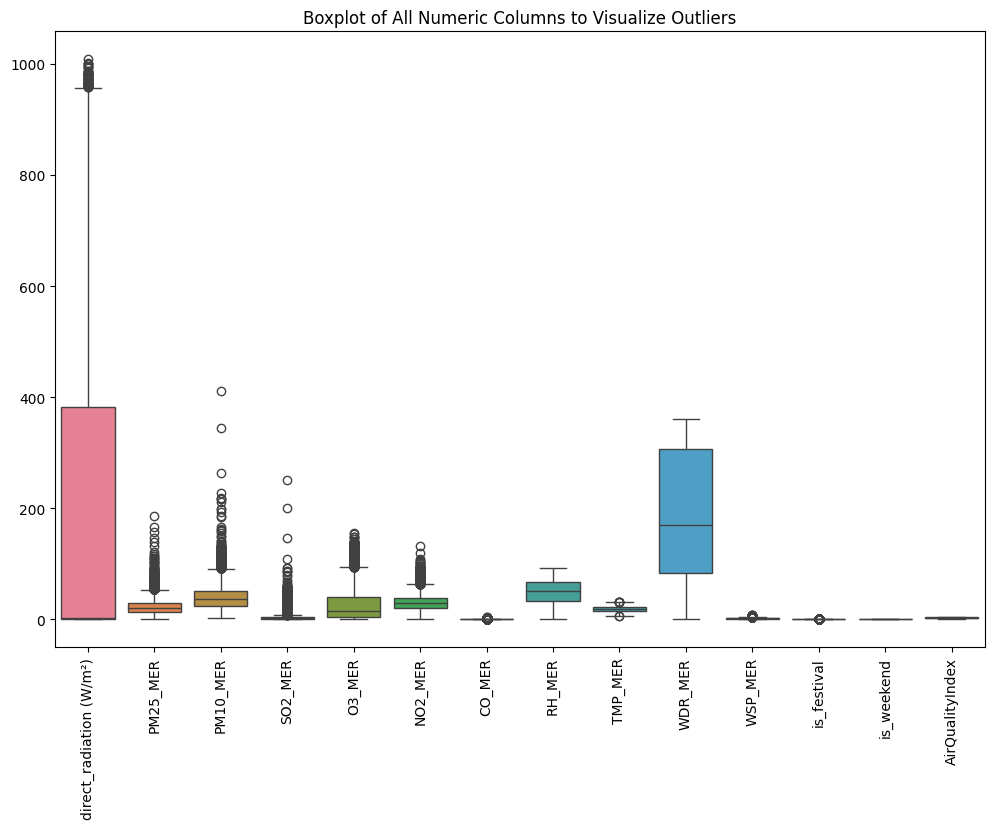

In [31]:
# Select only the numeric columns
numeric_cols = Mer.select_dtypes(include=['float64', 'int64']).columns

# Create a boxplot for all numeric columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=Mer[numeric_cols])
plt.title('Boxplot of All Numeric Columns to Visualize Outliers')
plt.xticks(rotation=90)
plt.show()

## Correlation between variables 

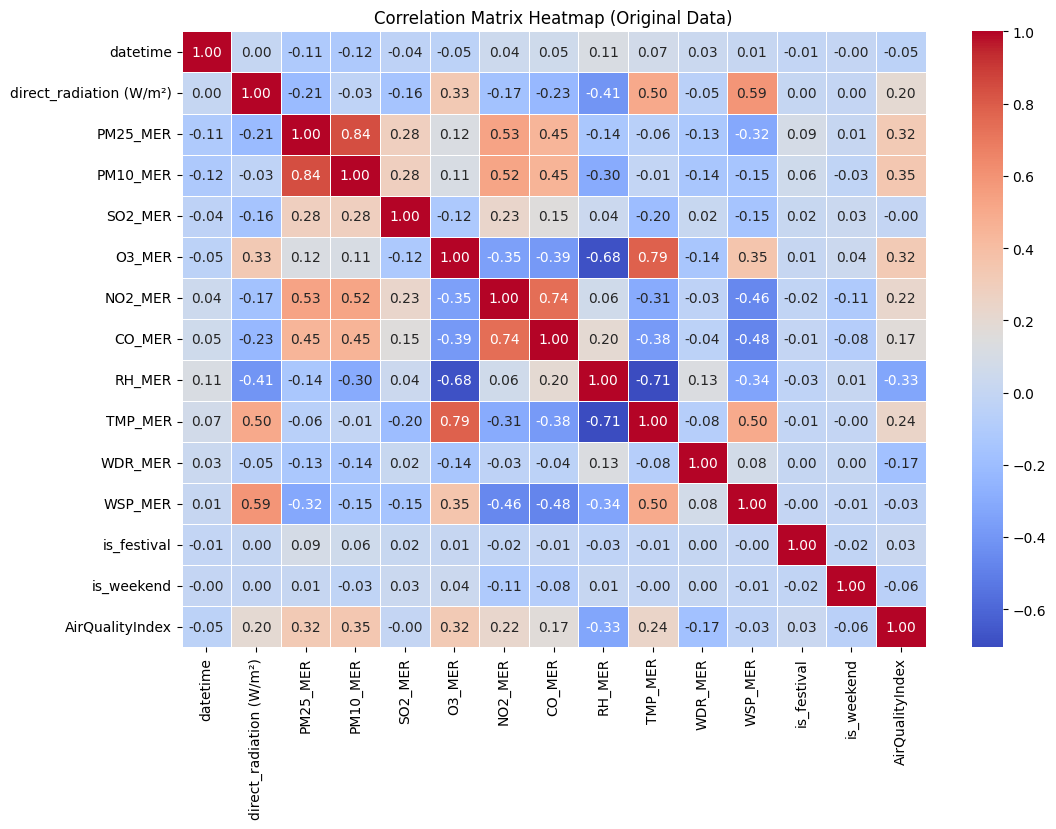

In [32]:
correlation_matrix = Mer.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title('Correlation Matrix Heatmap (Original Data)')
plt.show()


### The correlation matrix provides insights into the relationships between various variables in the dataset. Notably, PM10_MER and PM25_MER exhibit a strong positive correlation (0.84), indicating that increases in particulate matter of one size are closely linked to increases in the other, likely reflecting similar sources or atmospheric behaviors. Similarly, TMP_MER (temperature) shows a moderate positive correlation with direct_radiation (0.50) and WSP_MER (wind speed, 0.50), suggesting that higher temperatures are often associated with stronger solar radiation and wind conditions. On the other hand, RH_MER (relative humidity) is strongly negatively correlated with TMP_MER (-0.71), implying that higher temperatures tend to correspond with lower humidity levels.

### For air quality, AirQualityIndex demonstrates moderate positive correlations with PM25_MER (0.32), PM10_MER (0.35), and O3_MER (0.32), indicating that elevated particulate matter and ozone levels are associated with poorer air quality. Interestingly, direct_radiation has a weaker positive correlation with AirQualityIndex (0.20), suggesting that sunlight could indirectly influence pollution through chemical reactions, such as ozone formation. Overall, these correlations highlight important relationships that could inform air pollution modeling and intervention strategies.

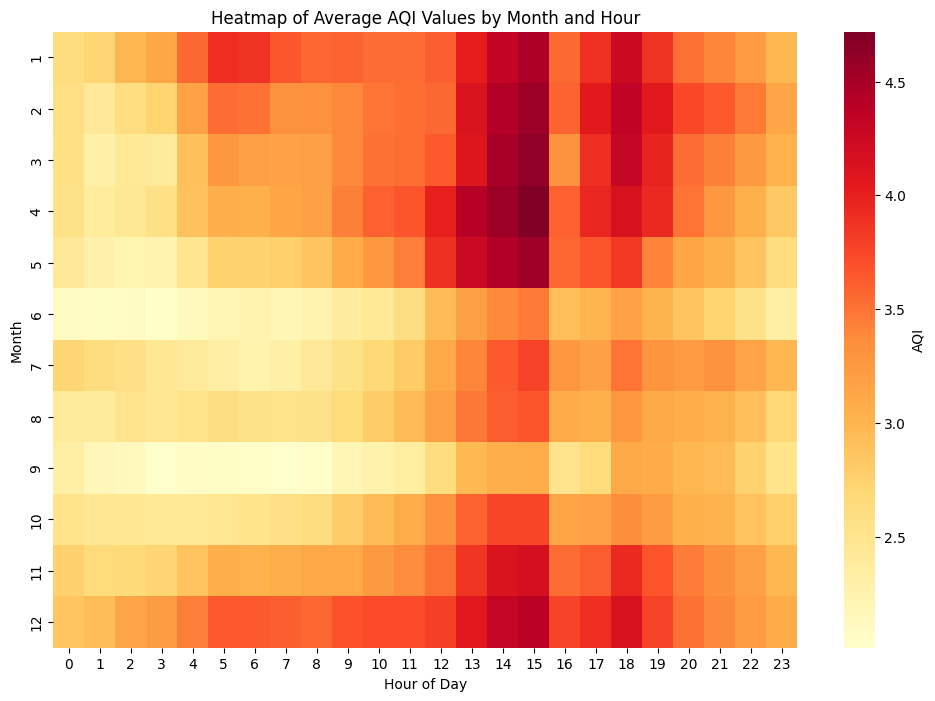

In [33]:
# Convert datetime column to datetime type
Mer['datetime'] = pd.to_datetime(Mer['datetime'])

# Set datetime as index
Mer.set_index('datetime', inplace=True)

Mer['month'] = Mer.index.month
Mer['hour'] = Mer.index.hour

monthly_hourly_aqi = Mer.groupby(['month', 'hour'])['AirQualityIndex'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(monthly_hourly_aqi, cmap='YlOrRd', cbar_kws={'label': 'AQI'})
plt.title('Heatmap of Average AQI Values by Month and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Month')
plt.show()


### The heatmap reveals that the highest AQI values are observed during the winter months, likely due to factors like increased residential heating, reduced ventilation, and increased emissions from certain industries. Specifically, months 12, 1, and 2 show the most intense red colors, indicating the highest average AQI readings.

### In terms of diurnal patterns, the heatmap suggests that air pollution peaks during late morning and early afternoon hours, between approximately 10 AM to 4 PM. This could be attributed to increased traffic congestion, industrial activity, and higher temperatures leading to increased ground-level ozone formation.

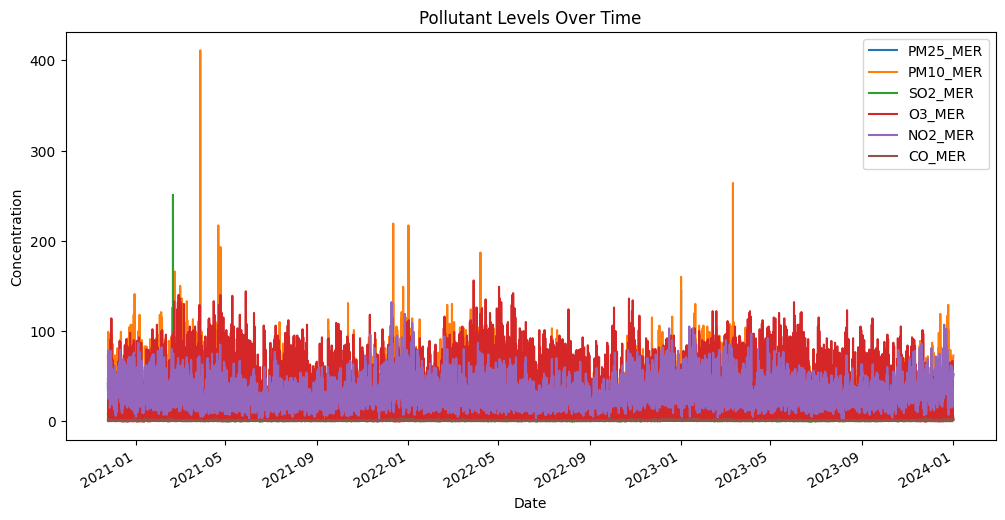

In [34]:
# pollutants Levels Over Time

pollutants = ['PM25_MER', 'PM10_MER', 'SO2_MER', 'O3_MER', 'NO2_MER', 'CO_MER']

fig, ax = plt.subplots(figsize=(12, 6))
for pollutant in pollutants:
    Mer[pollutant].plot(ax=ax, label=pollutant)

ax.set_title('Pollutant Levels Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Concentration')
ax.legend()
plt.show()


/var/folders/xp/s5kwcssj3dsc3zhrdm26l_100000gn/T/ipykernel_33789/2004104998.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  avg_pollutants = np.concatenate((avg_pollutants, [avg_pollutants[0]]))


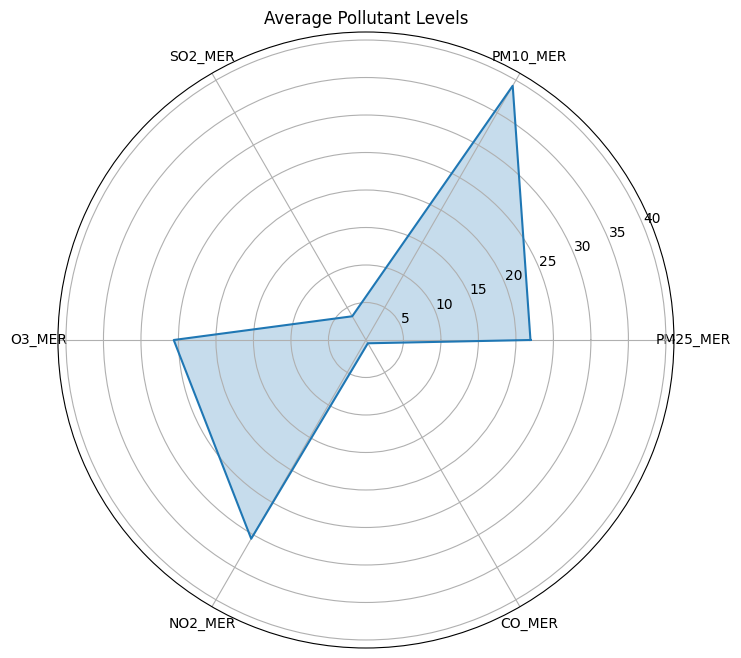

In [35]:

#Average Pollutants Levels

avg_pollutants = Mer[pollutants].mean()
angles = np.linspace(0, 2*np.pi, len(pollutants), endpoint=False)
avg_pollutants = np.concatenate((avg_pollutants, [avg_pollutants[0]]))
angles = np.concatenate((angles, [angles[0]]))

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))
ax.plot(angles, avg_pollutants)
ax.fill(angles, avg_pollutants, alpha=0.25)
ax.set_thetagrids(angles[:-1] * 180/np.pi, pollutants)
plt.title('Average Pollutant Levels')
plt.show()

## Descriptive Statistics

### Hourly mean for each varibale

In [36]:
# Group by hour and calculate mean for each variable
hourly_means = Mer.groupby(Mer.index.hour)[numeric_columns].mean()

print("\nHourly Means:")
print(hourly_means)


Hourly Means:
          direct_radiation (W/m²)   PM25_MER   PM10_MER   SO2_MER     O3_MER  \
datetime                                                                       
0                       85.289286  17.954892  33.397154  3.553664  11.372972   
1                       12.720430  17.878146  32.393304  3.895703  10.704208   
2                        0.017025  18.564143  31.807674  4.083315   9.944939   
3                        0.000000  19.066691  31.788278  4.212198   8.889402   
4                        0.000000  19.906997  32.609086  4.238258   7.470001   
5                        0.000000  20.792320  34.450269  4.125177   5.171082   
6                        0.000000  22.417479  38.532221  4.314777   3.125336   
7                        0.000000  24.428763  43.424087  4.638581   2.386518   
8                        0.000000  26.792740  48.553670  5.812799   3.558412   
9                        0.000000  29.140980  50.633289  6.629452   7.759670   
10                       

In [37]:

# Select numerical columns for analysis
numeric_columns = Mer.select_dtypes(include=[np.number]).columns

# Calculate descriptive statistics
desc_stats = Mer[numeric_columns].describe()

# Add additional statistics
desc_stats.loc['range'] = Mer[numeric_columns].max() - Mer[numeric_columns].min()
desc_stats.loc['variance'] = Mer[numeric_columns].var()
desc_stats.loc['skewness'] = Mer[numeric_columns].skew()
desc_stats.loc['kurtosis'] = Mer[numeric_columns].kurtosis()

# Print the descriptive statistics
print(desc_stats)

          direct_radiation (W/m²)      PM25_MER      PM10_MER       SO2_MER  \
count                26788.000000  26788.000000  26788.000000  26788.000000   
mean                   198.299313     21.938476     39.138806      3.653750   
std                    285.059521     12.670387     20.382502      5.767726   
min                      0.000000      1.000000      2.000000      0.000000   
25%                      0.000000     13.000000     24.000000      1.000000   
50%                      2.000000     20.000000     36.000000      2.000000   
75%                    383.000000     29.000000     51.000000      4.000000   
max                   1008.000000    186.000000    411.000000    251.000000   
range                 1008.000000    185.000000    409.000000    251.000000   
variance             81258.930306    160.538707    415.446368     33.266668   
skewness                 1.174386      1.345145      1.371658      9.201196   
kurtosis                -0.092886      5.387380     